# Efeito Aharonov-Bohm

- PET - Física
- Ex-Petiano: Gabriel Wendell Celestino Rocha
- Data: 05 de Maio de 2023

O objetivo deste `Notebook` é apresentar uma material introdutório sobre o efeito Aharonov-Bohm e anéis quânticos, assim como, desenvolver códigos para simulação do efeito Aharonov-Bohm em anéis quânticos. Este efeito quântico é importante conceitualmente porque consiste em três problemas (a existência física de potenciais, a fundamentalidade do princípio da mínima ação e o princípio da localidade) que aparecem na teoria eletromagnética clássica como uma teoria de calibre (*gauge*), a qual antes do advento da Mecânica Quântica era tratado apenas como uma formulação matemática sem consequências físicas (apenas filosóficas). Devido a sua importância, o efeito Aharonov-Bohm foi escolhido pela revista *New Scientist* como umas das *sete maravilhas do mundo quântico*. 

Para uma melhor organização deste `Notebook` como um todo, este foi dividido em **3** seções:

1. **Efeito Aharonov-Bohm**;
2. **Anéis Quânticos**;
3. **Simulação de um Anel Quântico**.

## Pré-requisitos

Este `Notebook` assume que o leitor tenha um conhecimento básico de Mecânica Quântica a nível de graduação, uma vez que o assunto aqui abordado geralmente só é apresentado em cursos avançados de pós-graduação em Mecânica Quântica ou em Trabalhos de Conclusão de Curso (TCCs) de estudantes que fazem pesquisa em áreas correlacionadas ou derivadas da Mecânica Quântica. Diante disso, é necessário que o leitor tenha conhecimento da área de Mecânica Quântica no nível apresentado no livro *Modern Quantum Mechanics* de J. J. Sakurai **[1]**. Note que esse `Notebook` serve como uma introdução ao efeito Aharanov-Bohm e como um possível tema a ser explorado em uma iniciação científica (IC).

### Importando as bibliotecas

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy.random import default_rng
import matplotlib.pyplot as plt
import numpy as np
import kwant

%matplotlib inline

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.rcParams['text.usetex'] = True
    # plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.size'] = 15
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)
    
import warnings
warnings.filterwarnings('ignore')

#### Detalhes das bibliotecas:

In [3]:
%load_ext version_information
%version_information Kwant, Matplotlib, Numpy

Software versions
Python 3.9.8 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.0.1
OS Windows 10 10.0.19044
Kwant 1.4.3
Matplotlib 3.6.0
Numpy 1.21.6
Fri Apr 21 19:30:53 2023 Hora Padrão de Buenos Aires

---

## 1. Efeito Aharonov-Bohm

O efeito Aharonov-Bohm é um fenômeno de interferência que demonstra a influência do potencial eletromagnético sobre a fase da função de onda de uma partícula carregada mesmo em uma região onde os campos eletromagnéticos são nulos.

### 1.1 Deslocamento do padrão de interferência devido à presença de um solenóide

Um solenoide infinito possui um campo magnético nulo em seu exterior, e em seu interior, esse campo é dado por

$$\tag{1.1}
\boldsymbol{B}=\frac{4\pi}{c}\nu I\boldsymbol{e}_{z}\quad,
$$

em que $I$ é a corrente circulando nas espiras do solenoide e $\nu$ é o número de de espiras por
unidade de comprimento.

Se $r$ é a distância radial até o centro do solenoide e $\boldsymbol{e}_{\phi}$ é o versor azimutal em coordendas polares, e dado um solenoide de raio da seção transversal igual a $R$, o potencial vetor produzido é

$$\tag{1.2}
\boldsymbol{A}\left(\boldsymbol{r}\right)=\begin{cases}
\frac{\Phi}{2\pi R^{2}}r\boldsymbol{e}_{\phi} & \text{para }r\leq R\quad;\\
\frac{\Phi}{2\pi}\frac{1}{r}\boldsymbol{e}_{\phi} & \text{para }r>R\quad.
\end{cases}
$$

Como os elétrons atravessam uma região em que os campos eletromagnéticos são nulos, não há atuação da força de Lorentz sobre eles. Todavia, a localização dos máximos do padrão de interferência dos elétrons depende do campo magnético confinado ao solenóide, conforme mostrado na equação

$$\tag{1.3}
Y_{n}=Y'_{n}+\frac{L\tilde{\lambda}}{d}\frac{e}{c\hbar}\Phi\quad.
$$

O fenômeno descrito nesta seção, em que o potencial altera a fase da função de onda, é o efeito Aharonov-Bohm, o qual foi previsto por Yakir Aharonov e David Bohm em 1959 [(**AHARONOV; BOHM, 1959**)](https://journals.aps.org/pr/abstract/10.1103/PhysRev.115.485) **[2]**. A primeira comprovação experimental foi publicada no ano seguinte [(**CHAMBERS, 1960**)](https://link.aps.org/doi/10.1103/PhysRevLett.5.3) **[3]**. Também é possível obter o efeito de alteração da fase da função de onda via fluxo elétrico [(**BROMLEY; GREINER, 2012**)](https://books.google.com.br/books?id=Ei7vCAAAQBAJ) **[4]**.

### 1.2 Incorporação de Efeitos Macroscópicos ao Efeito Aharonov-Bohm

O desvio de fase que resulta no deslocamento dos máximos do padrão de interferência, mostrado em $(1.3)$, não é devido à força de Lorentz, haja vista o campo elétrico ser nulo na região atravessada pelo elétron, estando o campo magnético confinado ao interior do solenoide.

O efeito macroscópico de deslocamento do padrão de interferência também pode ser calculado pela equação $(1.3)$. A figura abaixo ilustra o caso em que o campo magnético de intensidade B não está confinado ao interior de um solenoide, fazendo com que uma força de Lorentz de módulo $F=\left(e/c\right)vB$ atue sobre um elétron com velocidade $v$. Se essa força for aplicada ao elétron por um tempo $\tau$, o momento linear produzido será de $p_{y}=\tau F=\tau(e/c)vB$, com ângulo de deflexão $\tan\left(\theta\right)=p_{y}/p=\Delta Y/L$, resultando em

$$\tag{1.4}
\Delta Y=L\frac{p_{y}}{p}=DL\frac{eB}{pc}\quad.
$$

Observando a figura abaixo, nota-se que o fluxo magnético $\Phi$ é dado pela relação abaixo. Substituindo $\Phi$ em $(1.3)$ obtemos

$$\tag{1.5}
\Phi=\oint\text{d}\boldsymbol{S}\cdot\boldsymbol{B}=BDd\quad\therefore\quad \boxed{Y=\frac{L\tilde{\lambda}}{d}\frac{e}{c\hbar}\Phi=DL\frac{eB}{pc}}\quad.
$$

$\blacksquare$

Esse resultado está de acordo com o previsto pela equação $(1.4)$. Isso corrobora o fato de que o efeito macroscópico de deslocamento do padrão de interferência também pode ser calculado pela equação $(1.3)$.

![Figura 1](img/Aharanov-Bohm/img1.png)

---

## 2. Anéis Quânticos

Nesse capítulo será estudada a aparência da fase de Aharonov-Bohm para o caso em que um elétron tem o seu movimento restrito a um caminho circular ao redor de um fluxo magnético. Apresentações mais detalhadas dos tópicos abordados nesse capítulo podem ser encontradas em [(**IHN, 2010**)](https://books.google.com.br/books?id=UdgVDAAAQBAJ) **[5]** e [(**NAZAROV; BLANTER, 2009**)](https://books.google.com.br/books?id=bjmXJOFmqZIC) **[6]**.

### 2.1 Transmissão em um Anel Aberto

O hamiltoniano que descreve o movimento de uma carga $e$ que interage com um potencial vetor $\boldsymbol{A}$ é

$$\tag{2.1}
\hat{H}=\frac{1}{2m}\left(\hat{p}-\frac{e}{c}\boldsymbol{A}\right)^{2}+V\left(r\right)\quad.
$$

A uma distância $r$ do centro do anel (em que o fluxo está confinado), o potencial vetor é dado por

$$\tag{2.2}
\boldsymbol{A}=\frac{\phi}{2\pi r}\boldsymbol{e}_{\varphi}\quad.
$$

O _quantum_ de fluxo magnético é dado por

$$
\phi_{0}=\frac{hc}{e}=\frac{2\pi hc}{2\pi e}=\frac{2\pi\hbar c}{e}\implies \boldsymbol{A}=\frac{\phi}{2\pi r}\boldsymbol{e}_{\varphi}=\frac{\frac{2\pi\hbar c}{e}}{\phi_{0}}\frac{\phi}{2\pi r}\boldsymbol{e}_{\varphi}=\frac{\hbar c}{e}\frac{\phi}{\phi_{0}}\frac{1}{r}\boldsymbol{e}_{\varphi}
$$

$$\tag{2.3}
\therefore\quad\hat{H}=\frac{1}{2m}\left(-i\hbar\nabla-\frac{e}{c}\frac{\hbar c}{e}\frac{\phi}{\phi_{0}}\frac{1}{r}\boldsymbol{e}_{\varphi}\right)^{2}+V\left(r\right)\text{ }.
$$

Se o movimento do elétron estiver restrito à circunferência de raio $r=r_0$ no plano $z=0$, então $\nabla = \hat{e}_{r}\left(\partial/\partial r\right) + \hat{e}_{\varphi}\left(1/r\right)\partial/\partial\varphi + \hat{e}_{z}\left(\partial/\partial z\right)$ resume-se ao operador $\left(1/r\right)\partial/\partial\varphi$, portanto,

$$\tag{2.4}
\hat{H}=\frac{1}{2m}\left(-i\hbar\frac{1}{r_{0}}\frac{\partial}{\partial\varphi}-\frac{e}{c}\frac{\hbar c}{e}\frac{\phi}{\phi_{0}}\frac{1}{r_{0}}\right)^{2}=\frac{\hbar^{2}}{2mr_{0}^{2}}\left(-i\frac{\partial}{\partial\varphi}-\frac{\phi}{\phi_{0}}\right)^{2}\quad,
$$

com $V\left(r_0\right)=0$. A solução da equação de autovalores $\hat{H}\Psi=E\Psi$ pode ser dada por $\Psi_{\ell}=e^{i\ell\varphi}$. Substituindo $\Psi_{\ell}$ em $(2.4)$ chega-se a

$$
\left(-i\frac{\partial}{\partial\varphi}-\frac{\phi}{\phi_{0}}\right)e^{i\ell\varphi}=-i\frac{\partial}{\partial\varphi}e^{i\ell\varphi}-\frac{\phi}{\phi_{0}}e^{i\ell\varphi}=\ell e^{i\ell\varphi}-\frac{\phi}{\phi_{0}}e^{i\ell\varphi}=\left(\ell-\frac{\phi}{\phi_{0}}\right)\Psi_{\ell}
$$

$$
\left(-i\frac{\partial}{\partial\varphi}-\frac{\phi}{\phi_{0}}\right)^{2}\Psi_{\ell}=\left(\ell-\frac{\phi}{\phi_{0}}\right)^{2}\Psi_{\ell}\implies\hat{H}\Psi_{\ell}=\frac{\hbar^{2}}{2mr_{0}^{2}}\left(\ell-\frac{\phi}{\phi_{0}}\right)^{2}\Psi_{\ell}=E_{\ell}\Psi_{\ell}
$$

$$\tag{2.5}
\implies\ell-\frac{\phi}{\phi_{0}}=\pm\sqrt{\frac{2mr_{0}^{2}}{\hbar^{2}}E_{\ell}}\implies\ell=\pm\sqrt{\frac{2mE_{\ell}}{\hbar^{2}}r_{0}^{2}}+\frac{\phi}{\phi_{0}}\quad\therefore\quad\boxed{\ell=\pm kr_{0}+\frac{\phi}{\phi_{0}}}\quad,
$$

onde $k=\sqrt{2mE_{\ell}}/\hbar$ é o número de onda. Há dois estados possíveis para o elétron, que correspondem a circular o anel em sentido horário ou anti-horário, conforme ilustrado na figura abaixo:

![Figura 2](img/Aharanov-Bohm/img2.png)

O terminal de entrada pode ser modelado com fase $\varphi=0$. O elétron pode chegar ao terminal de saída percorrendo o anel em sentido horário até a fase $\varphi=\pi$ ou em sentido anti-horário até a fase $\varphi=−\pi$. Dessa forma, a função de onda que descreve o elétron transmitido é

$$\tag{2.6}
\Psi=\left[\frac{1}{\sqrt{2}}e^{i\left(kr_{0}+\frac{\phi}{\phi_{0}}\right)\pi}+\frac{1}{\sqrt{2}}e^{i\left(-kr_{0}+\frac{\phi}{\phi_{0}}\right)\left(-\pi\right)}\right]\frac{1}{\sqrt{2}}\quad,
$$

onde um dos fatores $1/\sqrt{2}$ é devido a entrada do elétron no anel e o outro fator $1/\sqrt{2}$ é devido a saída. Dessa forma, a transmissão $T$ é dada por

$$
T=\left|\Psi\right|^{2}=\frac{1}{4}\left|e^{i\left(kr_{0}+\frac{\phi}{\phi_{0}}\right)\pi}+e^{i\left(-kr_{0}+\frac{\phi}{\phi_{0}}\right)\left(-\pi\right)}\right|^{2}=\frac{\left|e^{i\left(kr_{0}\pi\right)}\right|^{2}}{4}\cdot\left[2\cos\left(\frac{\phi}{\phi_{0}}\pi\right)\right]^{2}
$$

$$\tag{2.7}
\implies T=\cos^{2}\left(\frac{\phi}{\phi_{0}}\pi\right)=\frac{1}{2}+\frac{1}{2}\cos\left(\frac{\phi}{\phi_{0}}2\pi\right)\quad\therefore\quad\boxed{T=\frac{1}{2}\left[1+\cos\left(\frac{\phi}{\phi_{0}}2\pi\right)\right]}\quad.
$$

$\blacksquare$

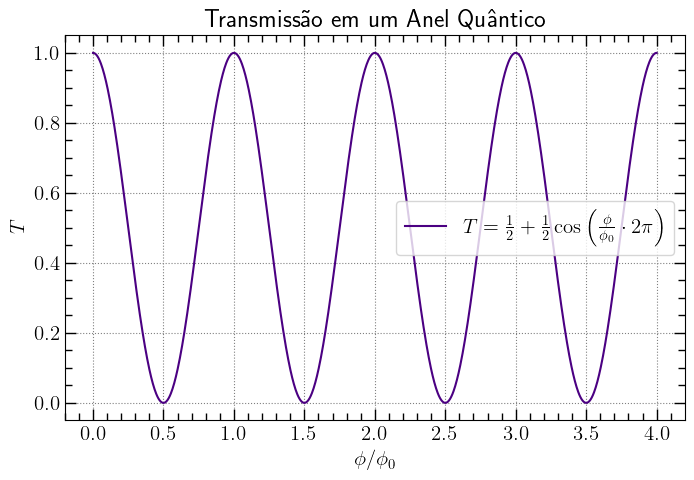

In [5]:
ratio_phi = np.linspace(0, 4, 1000)
T = 0.5 + 0.5*np.cos(ratio_phi*2*np.pi)


plt.figure(figsize = (8,5))
plt.plot(ratio_phi, T, color = 'indigo', label = r'$T=\frac{1}{2}+\frac{1}{2}\cos\left(\frac{\phi}{\phi_{0}}\cdot2\pi\right)$')
plt.title('Transmissão em um Anel Quântico')
plt.xlabel(r'$\phi/\phi_0$')
plt.ylabel(r'$T$')

plt.legend(loc = 'best')
opt_plot()
plt.savefig('Transmissão_Anel-Quântico.png', dpi = 400)

A transmissão possui também um termo independente do fluxo, associado com probabilidades clássicas de reflexão (elétrons refletidos na entrada do anel). Há ainda um outro termo da transmissão, associado com as oscilações *Altshuler-Aronov-Spivak* (elétrons refletidos após circular completamente o anel). As oscilações de efeito Aharonov-Bohm acentuam-se com a redução da temperatura, e geralmente não são observadas à temperatura ambiente.

---

## 3. Simulação de um Anel Quântico

Nesta seção vamos simular um anel quântico utilizando o módulo `kwant` da linguagem Python. O objetivo dessa seção não é descrever os métodos que serviram de base para a criação do pacote `kwant`, porém, será necessário apresentar alguns poucos conhecimentos sobre modelos de ligações fortes e representação matricial do Hamiltoniano. Na primeira seção é apresentado o caso unidimensional. Na segunda seção é apresentado o caso bidimensional. Finalmente, na última seção, é apresentada a descrição detalhada do código Python utilizado na simulação do anel quântico, sendo obtida a curva de condutância em função do fluxo magnético.

### 3.1  Representação Matricial do Hamiltoniano

A figura abaixo, ilustra uma cadeia unidimensional formada por cinco sítios atômicos, com índices $i$ variando de $0$ a $4$.

![Figura 3](img/Aharanov-Bohm/img3.png)

Para uma cadeia unidimensional com constante de rede $a$, a discretização do Hamiltoniano $H$ da equação de Schrödinger será,

$$\tag{3.1}
E\Psi=\left(-\frac{\hbar^{2}}{2m}\frac{\text{d}^{2}}{\text{d}x^{2}}+U\right)\Psi=\hat{H}\Psi\quad,
$$

utilizando uma diferença finita centrada, resulta em:

$$\tag{3.2}
E\Psi_{i}=-\frac{\hbar^{2}}{2m}\frac{\Psi_{i+1}+\Psi_{i-1}-2\Psi_{i}}{a^{2}}+U\Psi_{i}\quad.
$$

Fazendo $t=\frac{\hbar^{2}}{2ma^{2}}$, e $U=0$, tem-se

$$\tag{3.3}
E\Psi_{i}=-t\Psi_{i-1}+2t\Psi_{i}-t\Psi_{i+1}\quad.
$$

Para o caso da cadeia mostrada na figura acima, chega-se as expressões

\begin{cases}\tag{3.4}
E\Psi_{0}= & -t\Psi_{-1}+2t\Psi_{0}-t\Psi_{1}\quad,\\
E\Psi_{1}= & -t\Psi_{0}+2t\Psi_{1}-t\Psi_{2}\quad,\\
E\Psi_{2}= & -t\Psi_{1}+2t\Psi_{2}-t\Psi_{3}\quad,\\
E\Psi_{3}= & -t\Psi_{2}+2t\Psi_{3}-t\Psi_{4}\quad,\\
E\Psi_{4}= & -t\Psi_{3}+2t\Psi_{4}-t\Psi_{5}\quad.
\end{cases}

Utilizando as condições de contorno $\Psi_{i}\left(-1\right)=\Psi_{i}\left(5\right)=0$, obtém-se a matriz Hamiltoniana

$$\tag{3.5}
H=\left(\begin{array}{ccccc}
2t & -t & 0 & 0 & 0\\
-t & 2t & -t & 0 & 0\\
0 & -t & 2t & -t & 0\\
0 & 0 & -t & 2t & -t\\
0 & 0 & 0 & -t & 2t
\end{array}\right)\quad.
$$

$\blacksquare$

### 3.2 Modelo de Ligações Fortes

Uma rede de Bravais bidimensional é o conjunto de pontos que possuem vetores posição $\boldsymbol{R}$ da forma

$$\tag{3.6}
\boldsymbol{R}=n_{x}\boldsymbol{a}_{x}+n_{y}\boldsymbol{a}_{y}\quad,
$$

em que $\boldsymbol{a}_{x}$ e $\boldsymbol{a}_{y}$ são vetores no plano da rede e $n_{x},n_{y}\in\mathbb{Z}$. Na figura abaixo, é mostrada uma rede de Bravais quadrada.

Os pontos da rede de Bravais podem ser preenchidos com um mesmo conjunto de átomos, denominado de base. Uma rede de Bravais com uma base forma uma estrutura cristalina, que caracteriza os sólidos cristalinos.

A periodicidade da rede de Bravais quadrada com $\boldsymbol{R}=n_{x}\boldsymbol{a}_{x}+n_{y}\boldsymbol{a}_{y}$ mostrada na figura abaixo resulta na periodicidade do potencial $U\left(\boldsymbol{r}\right)$, dado por

$$\tag{3.7}
U\left(\boldsymbol{r}\right)=U\left(\boldsymbol{r}+\boldsymbol{R}\right)\quad.
$$

![Figura 4](img/Aharanov-Bohm/img4.png)

O teorema de Bloch afirma que num potencial periódico a função de onda $\psi_{\boldsymbol{k}}\left(\boldsymbol{r}\right)$de um elétron independente, que não interage com os demais elétrons, é dada pelo produto de uma onda plana por uma função periódica da rede $u_{\boldsymbol{k}}\left(\boldsymbol{k}\right)$, isto é,

$$\tag{3.8}
\psi_{\boldsymbol{k}}\left(\boldsymbol{r}\right)=\exp\left(i\boldsymbol{k}\cdot\boldsymbol{r}\right)\cdot u_{\boldsymbol{k}}\left(\boldsymbol{r}\right),\quad\text{com:}\quad u_{\boldsymbol{k}}\left(\boldsymbol{r}\right)=u_{\boldsymbol{k}}\left(\boldsymbol{r}+\boldsymbol{R}\right)\quad.
$$

Levando em conta a interação entre os elétrons, a função de onda $\Psi\left(\boldsymbol{r}\right)$ de um elétron em qualquer ponto da rede pode ser obtida através da **combinação linear de orbitais atômicos** ou LCAO (*Linear Combinations of Atomic Orbitals*), sendo expressa como

$$\tag{3.9}
\Psi_{\boldsymbol{k}}\left(\boldsymbol{r}\right)=\sum_{m}c_{m}\cdot\psi_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)=\frac{1}{\sqrt{N}}\sum_{m}\exp\left(i\boldsymbol{k}\cdot\boldsymbol{r}_{m}\right)\cdot u_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)=\sum_{m}C_{m}\cdot u_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)\quad\therefore\quad C_{m}=\frac{1}{\sqrt{N}}\cdot\exp\left(i\boldsymbol{k}\cdot\boldsymbol{r}_{m}\right)\quad,
$$

onde $\boldsymbol{r}_{m}$ é a posição do $m$-ésimo átomo e $N$ é o número total de sítios atômicos (pontos da rede de Bravais quadrada contendo um único átomo). Resolvendo a equação de Schrödinger independente do tempo para $(3.8)$, tem-se

$$
H\Psi_{\boldsymbol{k}}=E\Psi_{\boldsymbol{k}}\iff u^{*}_{\boldsymbol{k}}\left(\boldsymbol{r}_{n}\right)H\Psi_{\boldsymbol{k}}=u^{*}_{\boldsymbol{k}}\left(\boldsymbol{r}_{n}\right)E\Psi_{\boldsymbol{k}}=E u^{*}_{\boldsymbol{k}}\left(\boldsymbol{r}_{n}\right)\Psi_{\boldsymbol{k}}\quad,
$$

$$\tag{3.10}
\implies u_{\boldsymbol{k}}^{*}\left(\boldsymbol{r}_{n}\right)H\sum_{m}C_{m}u_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)=Eu_{\boldsymbol{k}}^{*}\left(\boldsymbol{r}_{n}\right)\left[\sum_{m}C_{m}u_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)\right]\quad \therefore \quad \sum_{m}u_{\boldsymbol{k}}^{*}\left(\boldsymbol{r}_{n}\right)Hu_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)C_{m}=E\sum_{m}u_{\boldsymbol{k}}^{*}\left(\boldsymbol{r}_{n}\right)u_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)C_{m}\quad.
$$

Integrando a equação anterior em todo o espaço e definindo

$$
\begin{cases}\tag{3.11}
H_{nm} = & \int u_{\boldsymbol{k}}^{*}\left(\boldsymbol{r}_{n}\right)Hu_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)\text{d}\boldsymbol{r}\quad,\\
S_{nm} = & \int u_{\boldsymbol{k}}^{*}\left(\boldsymbol{r}_{n}\right)u_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)\text{d}\boldsymbol{r}\quad, 
\end{cases}
\implies\sum_{m}H_{nm}C_{m}=E\sum_{m}S_{nm}C_{m}\quad.
$$

Da definição de $S_{nm}$, vê-se que, se $u_{\boldsymbol{k}}\left(\boldsymbol{r}_{m}\right)$ for ortonormal, então $S_{nm}=1$ para $n=m$ e $S_{nm}=0$ para $n\neq m$, portanto,

$$\tag{3.12}
EC_{n}=\sum_{m}H_{nm}C_{m}\implies E=\sum_{m}H_{nm}\frac{C_{m}}{C_{n}}\implies E=\sum_{m}H_{nm}\frac{\frac{1}{\sqrt{N}}\cdot e^{\left(i\boldsymbol{k}\cdot\boldsymbol{r}_{m}\right)}}{\frac{1}{\sqrt{N}}\cdot e^{\left(i\boldsymbol{k}\cdot\boldsymbol{r}_{n}\right)}}\quad\therefore\quad\boxed{E\left(\boldsymbol{k}\right)=\sum_{m}H_{nm}\cdot\exp\left[i\boldsymbol{k}\cdot\left(\boldsymbol{r}_{m}-\boldsymbol{r}_{n}\right)\right]}\quad,
$$

$\blacksquare$

que é a relação de dispersão para um elétron na rede cristalina.

Para uma constante de rede $||\boldsymbol{a}_{x}||=||\boldsymbol{a}_{y}||=a$, utilizando um modelo de ligações fortes (*tight binding*), em que $\varepsilon$ é o elemento da matriz Hamiltoniana correspondente ao sítio atômico e $−t$ é o elemento de salto (*hopping*) entre átomos que são primeiros vizinhos, conforme ilustrado na figura abaixo, tem-se $H_{mm}=\varepsilon$, $H_{nm}=−t$ para $\boldsymbol{r}_{m}−\boldsymbol{r}_{n}=\boldsymbol{a}_{x}$, $\boldsymbol{r}_{m}−\boldsymbol{r}_{n}=\boldsymbol{a}_{y}$, $\boldsymbol{r}_{m}−\boldsymbol{r}_{n}=−\boldsymbol{a}_{x}$, $\boldsymbol{r}_{m}−\boldsymbol{r}_{n}=−\boldsymbol{a}_{y}$, e $H_{nm}=0$ para outros valores de $\boldsymbol{r}_{m}−\boldsymbol{r}_{n}$. Daí resulta que

$$\tag{3.13}
E\left(\boldsymbol{k}\right)=\varepsilon-t\cdot e^{ik_{x}a}-t\cdot e^{ik_{y}a}-t\cdot e^{-ik_{x}a}-t\cdot e^{-ik_{y}a}\quad\therefore\quad \boxed{E\left(\boldsymbol{k}\right)=\varepsilon-2t\cos\left(k_{x}a\right)-2t\cos\left(k_{y}a\right)}\quad.
$$

Se $E\left(0\right)=0$, temos então

$$\tag{3.14}
E\left(0\right)=\varepsilon-2t-2t=\varepsilon-4t=0\implies\varepsilon=4t\quad.
$$

Dessa forma, se a matriz hamiltoniana $H$ for discretizada nos sítios atômicos identificados pelas coordenadas espaciais inteiras $\left(i,j\right)$ de uma rede com constante de rede $a$, então

\begin{cases}\tag{3.15}
H_{n_{\left(i,j\right)}m_{\left(i,j\right)}} = & 4t\quad,\\
H_{n_{\left(i,j\right)}m_{\left(i,j-1\right)}} = & H_{n_{\left(i,j\right)}m_{\left(i-1,j\right)}}=-t\quad.
\end{cases}

![Figura 5](img/Aharanov-Bohm/img5.png)

$\blacksquare$

---

### 3.3 Simulação do Efeito Aharonov-Bohm

O efeito Aharonov-Bohm em um anel condutor pode ser simulado através de um script escrito em linguagem python com o pacote [`kwant`](https://kwant-project.org/doc/1/). 

Primeiro, criamos a matriz Hamitoniana da região de espalhamento através do construtor [`Builder()`](https://kwant-project.org/doc/1/reference/generated/kwant.builder.Builder) do módulo `kwant`. Em seguida, utilizamos o método [`lattice.square()`](https://kwant-project.org/doc/1.0/reference/generated/kwant.lattice.square) para criar uma rede quadrada. Nesse método devemos fornecer como argumento a constante da rede $a$. Aqui, vamos definir uma rede quadrada com constante de rede unitária, ou seja, $a=1$:

In [6]:
H = kwant.Builder()

a = 1
lattice = kwant.lattice.square(a)

Vamos utilizar um sistema de unidades tal que $t=\hbar^{2}/2ma^{2}$ para definir o raio externo do anel, o raio interno do anel e a largura de contato, respectivamente:

In [7]:
t = 1.0
r_ext = 20*a
r_int = 10*a
cont_width = 8*a

A matriz Hamiltoniana é definida de maneira que $\varepsilon=4t$ e o elemento de salto entre átomos que são primeiros vizinhos seja $−t$. Para isso, são criados dois laços do tipo `for` que varrem todos os pontos da rede, os quais foram aqui identificados como `lattice(i, j)`. Para preencher a matriz Hamiltoniana, atribui-se diretamente seus valores ao array `H` criado, utilizando como índices o sítio atômico `[lattice(i, j)]`, para o elemento no sítio, e `[lattice(i1, j1), lattice(i2, j2)]`, para o potencial de salto entre primeiros vizinhos. A matriz Hamiltoniana da região de espalhamento é definida como:

In [8]:
for i in range(2*r_ext):
    for j in range(2*r_ext):
        if ((i - r_ext)**2+(j - r_ext)**2 > (r_int)**2) \
            and ((i - r_ext)**2 + (j - r_ext)**2<(r_ext)**2):
            H[lattice(i - r_ext, j - r_ext)] = 4 * t
            
            if ((i - r_ext)**2 + (j-1 - r_ext)**2 > (r_int)**2) \
                and ((i - r_ext)**2 + (j-1 - r_ext)**2 < (r_ext)**2):
                H[lattice(i - r_ext,j - r_ext), lattice(i - r_ext, j\
                    - r_ext - 1)] = -t
                
            if ((i-1 - r_ext)**2 + (j - r_ext)**2 > (r_int)**2) \
                and ((i-1  -r_ext)**2+(j - r_ext)**2 < (r_ext)**2):
                    H[lattice(i - r_ext, j - r_ext), lattice(i - r_ext-1, j\
                        - r_ext)] = -t

Os elétrons são modelados como ondas planas que entram na região de espalhamento através de um contato semi-infinito, e saem dela por outro contato semi-infinito. Para definir o Hamiltoniano de um contato, utiliza-se o construtor `Builder()`, cujo argumento deve ser um objeto que define a simetria do contato, criado pelo construtor [`TranslationalSymmetry()`](https://kwant-project.org/doc/1/reference/generated/kwant.lattice.TranslationalSymmetry), que pode ter como argumento um vetor $\boldsymbol{v}$, indicando o módulo e o sentido da translação espacial em que o contato será infinitamente estendido. O vetor $\boldsymbol{v}$ deve ser $(−a,0)$ e $(a, 0)$, respectivamente, nos contatos esquerdo e direito. Os contatos são então construídos:

In [9]:
left_cont_symmetry = kwant.TranslationalSymmetry((-a, 0))
left_cont_H = kwant.Builder(left_cont_symmetry)

right_cont_symmetry = kwant.TranslationalSymmetry((a, 0))
right_cont_H = kwant.Builder(right_cont_symmetry)

Os Hamiltonianos dos contatos são preenchidos da seguinte forma:

In [10]:
for j in range(2*r_ext):
    if j >= r_ext - cont_width/2 \
        and j <= r_ext + cont_width/2:
        left_cont_H[lattice(0 - r_ext, j - r_ext)] = 4*t
        left_cont_H\
            [lattice(1 - r_ext, j - r_ext), lattice(0 - r_ext, j\
                - r_ext)] = -t
        if j > r_ext - cont_width/2:
            left_cont_H\
                [lattice(0 - r_ext, j - r_ext), lattice(0 - r_ext, j - 1\
                    - r_ext)] = -t
            
    for j in range(2*r_ext):
        if j >= r_ext - cont_width/2 \
            and j <= r_ext + cont_width/2:
            right_cont_H[lattice(0 - r_ext, j - r_ext)] = 4*t
            right_cont_H\
                [lattice(2*r_ext+1 - r_ext, j - r_ext), lattice(2*r_ext\
                    - r_ext, j - r_ext)] = -t
            if j > r_ext - cont_width/2:
                right_cont_H\
                    [lattice(2*r_ext - r_ext, j - r_ext), \
                        lattice(2*r_ext - r_ext, j-1 - r_ext)] = -t

O método `attach_lead()` tem a função de anexar um contato ao objeto da classe `Builder()`. Os Hamiltonianos dos contatos foram anexados ao Hamiltoniano do sistema. O método `plot()` do pacote `kwant` plota o modelo da estrutura que está sendo simulada. A seu turno, esse método utiliza o método `pyplot` do módulo `matplotlib`, sendo necessário, portanto, importá-lo para o programa. Para visualizar o sistema, escrevemos o seguinte:

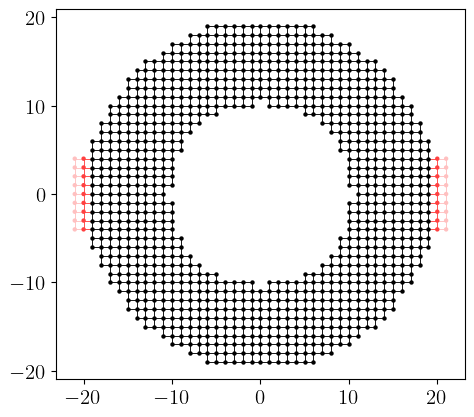

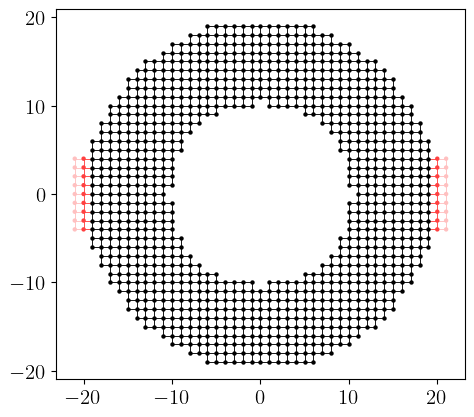

In [11]:
H.attach_lead(left_cont_H)
H.attach_lead(right_cont_H)

kwant.plotter.plot(H, site_color = 'black')

Criamos um array `conductance`, inicializado com valores iguais a zero. Criamos também um array `phi`, inicializando com os valores dos fluxos magnéticos no interior do anel em unidades $h/e$.

In [12]:
conductance = [0 for i in range(200)]
phi = [4.0*0.005*i for i in range(200)]

Em virtude da simetria do anel quântico, tem-se $\Psi\left(\theta+2\pi\right)=\Psi\left(\theta\right)$. No entanto, o efeito do fluxo $\phi_{B}$ é o de criar uma diferença de fase de Aharonov-Bohm igual a $2\pi\left(\phi_{B}/\phi_{0}\right)$:

$$\tag{3.16}
\Psi\left(\theta+2\pi\right)=\exp{\left(i\cdot 2\pi\frac{\phi_B}{\phi_0}\right)}\cdot\Psi\left(\theta\right)\quad,
$$

satisfazendo uma condição de contorno torcida, a qual está associada a um ramo de corte, como ilustrado na figura abaixo retirada de ([**SANTOS; WANG, 2014**](https://link.aps.org/doi/10.1103/PhysRevB.89.195122)) **[7]**.

![Figura 6](img/Aharanov-Bohm/img6.png)

Vamos criar um laço do tipo `for` varrendo todos os valores de fluxo magnético do array `phi`. Modificamos o Hamiltoniano dos sítios atômicos sob o ramo de corte ilustrado na figura abaixo. Para cada valor de fluxo magnético repetiu-se as tarefas: finalizar o Hamiltoniano do sistema, calcular a matriz de espalhamento e calcular a probabilidade de transmissão:

![Figura 7](img/Aharanov-Bohm/img7.png)

In [13]:
for i in range(200):
    for j in range(1,10):
        H[lattice(1, j - r_ext), lattice(0, j - r_ext)] \
            = -t*np.exp(2j*np.pi*phi[i])
    Hf = H.finalized()
    scatter_matrix = kwant.smatrix(Hf, 0.15*t)
    conductance[i] =\
        scatter_matrix.transmission(1, 0)

Vamos obter o gráfico da condutância em unidades de $e^{2}/h$ em função do fluxo magnético em unidades de $\left(h/e\right)$ da seguinte forma:

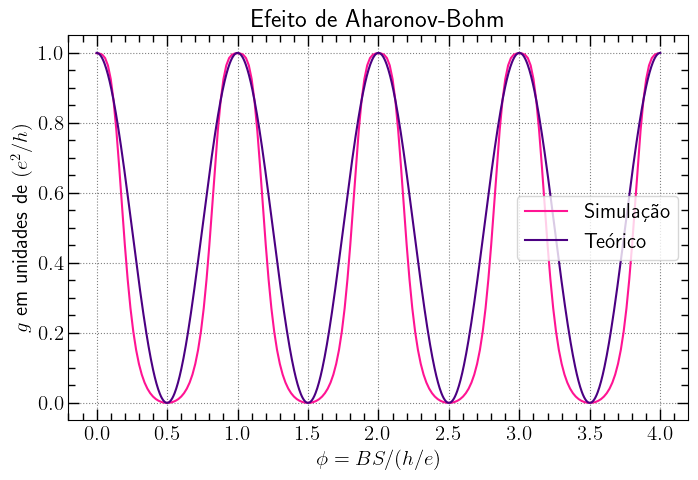

In [14]:
plt.figure(figsize = (8,5))

plt.plot(phi, conductance, color = 'deeppink', label = 'Simulação')
plt.plot(ratio_phi, T, color = 'indigo', label = 'Teórico')
plt.title('Efeito de Aharonov-Bohm')
plt.xlabel(r'$\phi = BS/(h/e)$')
plt.ylabel(r'$g$ em unidades de $(e^2/h)$')

plt.legend(loc = 'best')
opt_plot()
plt.savefig('Efeito de Aharonov-Bohm.png', dpi = 400)

$\blacksquare$

Comparando a curva obtida acima com o gráfico das oscilações de Aharonov-Bohm em um anel quântico obtidas no seção anterior, nota-se que são muito semelhantes, o que demonstra que para os parâmetros utilizados, essas oscilações são mais relevantes
que os demais efeitos possíveis.

---

## Referências

**[1]** J.J. SAKURAI, *Modern Quantum Mechanics* (Addison-Wesley Publis Comp, New York, 1994). Disponível em: https://books.google.com.br/books/about/Modern_Quantum_Mechanics.html?id=N4I-AQAACAAJ&redir_esc=y

**[2]** AHARONOV, Y.; BOHM, D. *Significance of electromagnetic potentials in the quantum theory*. Phys. Rev., American Physical Society, v. **115**, p. 485–491, Aug 1959. Disponível em: <https://link.aps.org/doi/10.1103/PhysRev.115.485>.

**[3]** CHAMBERS, R. G. *Shift of an electron interference pattern by enclosed magnetic flux*. Phys. Rev. Lett., American Physical Society, v. **5**, p. 3–5, Jul 1960. Disponível em:<https://link.aps.org/doi/10.1103/PhysRevLett.5.3>. 

**[4]** BROMLEY, D.; GREINER, W. *Quantum Mechanics: Special Chapters*. Springer Berlin Heidelberg, 2012. ISBN 9783642588471. Disponível em: <https://books.google.com.br/books?id=Ei7vCAAAQBAJ>. 

**[5]** IHN, T. *Semiconductor Nanostructures: Quantum States and Electronic Transport*. OUP Oxford, 2010. ISBN 9780199534425. Disponível em: <https://books.google.com.br/books?id=UdgVDAAAQBAJ>. 

**[6]** NAZAROV, Y.; BLANTER, Y. *Quantum Transport: Introduction to Nanoscience*. Cambridge University Press, 2009. ISBN 9781139478175. Disponível em: <https://books.google.com.br/books?id=bjmXJOFmqZIC>. 

**[7]** SANTOS, L. H.; WANG, J. *Symmetry-protected many-body aharonov-bohm effect*. Phys. Rev. B, American Physical Society, v. **89**, p. 195122, May 2014. Disponível em: <https://link.aps.org/doi/10.1103/PhysRevB.89.195122>.

---